In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Kết nối MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Minhthinh@2k5",
    database="DB_STORAGE2"
)

# Lấy toàn bộ dữ liệu từ bảng
query = "SELECT * FROM houses"
df = pd.read_sql(query, conn)

# Đóng kết nối
conn.close()

# Kiểm tra dữ liệu
df.shape    # Số dòng, số cột
df.info()   # Kiểu dữ liệu



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2824 non-null   int64 
 1   location       2824 non-null   object
 2   price          2670 non-null   object
 3   area           2824 non-null   object
 4   date_posted    2824 non-null   object
 5   fridge         2824 non-null   object
 6   washer         2824 non-null   object
 7   air_condition  2824 non-null   object
 8   wifi           2824 non-null   object
dtypes: int64(1), object(8)
memory usage: 198.7+ KB


C:\Users\PC THINH\AppData\Local\Temp\ipykernel_13972\2069839808.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [6]:
#Mô tả thống kê cơ bản→ Giúp bạn biết giá trị trung bình, min, max, độ lệch chuẩn, giá trị thiếu (NaN)...
df.describe(include="all")

,id,location,price,area,date_posted,fridge,washer,air_condition,wifi
count,2824.000000,2824,2670,2824,2824,2824,2824,2824,2824
unique,NaN,7,39,35,66,2,2,2,2
top,NaN,"Hải Châu, Đà Nẵng",1500000.0,20.0,2021-10-28,0,0,0,0
freq,NaN,712,402,738,479,1952,1883,1926,1612
mean,1519.801346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,865.005367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,775.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1536.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2283.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#kiểm tra dữ liệu bị thiếu (NaN)
df.isnull().sum().sort_values(ascending=False)

price            154
id                 0
location           0
area               0
date_posted        0
fridge             0
washer             0
air_condition      0
wifi               0
dtype: int64

In [8]:
#Ép kiểu dữ liệu đúng chuẩn -> 
print(df.dtypes)
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["area"] = pd.to_numeric(df["area"], errors="coerce")

df["date_posted"] = pd.to_datetime(df["date_posted"], errors="coerce")




id                int64
location         object
price            object
area             object
date_posted      object
fridge           object
washer           object
air_condition    object
wifi             object
dtype: object


In [9]:
df['price'] = df['price'].fillna(df['price'].mean())


In [10]:
print(df.describe(include="all"))
print(df.info())


                 id           location         price         area  \
count   2824.000000               2824  2.824000e+03  2824.000000   
unique          NaN                  7           NaN          NaN   
top             NaN  Hải Châu, Đà Nẵng           NaN          NaN   
freq            NaN                712           NaN          NaN   
mean    1519.801346                NaN  3.690581e+07    26.637040   
min        1.000000                NaN  1.000000e+06     5.000000   
25%      775.750000                NaN  1.500000e+06    20.000000   
50%     1536.500000                NaN  2.000000e+06    20.500000   
75%     2283.250000                NaN  2.800000e+06    27.000000   
max     2989.000000                NaN  1.000000e+10   390.000000   
std      865.005367                NaN  4.741637e+08    27.771976   

                          date_posted fridge washer air_condition  wifi  
count                            2824   2824   2824          2824  2824  
unique                 

In [11]:
df = df[(df['price'] >= 1500000) & (df['price'] <= 8000000)]
df = df[(df['area'] >= 10) & (df['area'] <= 50)]

df['district'] = df['location'].apply(lambda x: x.split(',')[0].strip())


In [12]:
print(" Shape sau khi lọc:", df.shape)
print("\n Giá trị thống kê Price:")
print(df['price'].describe())
print("\n Thống kê Area:")
print(df['area'].describe())
print("\n Giá trị unique District:")
print(df['district'].value_counts())



 Shape sau khi lọc: (2163, 10)

 Giá trị thống kê Price:
count    2.163000e+03
mean     2.243551e+06
std      8.280237e+05
min      1.500000e+06
25%      1.700000e+06
50%      2.000000e+06
75%      2.500000e+06
max      6.900000e+06
Name: price, dtype: float64

 Thống kê Area:
count    2163.000000
mean       24.123902
std         7.087754
min        10.000000
25%        20.000000
50%        22.000000
75%        27.000000
max        50.000000
Name: area, dtype: float64

 Giá trị unique District:
district
Hải Châu        584
Ngũ Hành Sơn    431
Cẩm Lệ          326
Thanh Khê       301
Liên Chiểu      277
Sơn Trà         218
Hòa Vang         26
Name: count, dtype: int64


In [13]:
df[df.duplicated(subset=["location", "price", "area"], keep=False)]

,id,location,price,area,date_posted,fridge,washer,air_condition,wifi,district
0,1,"Cẩm Lệ, Đà Nẵng",6900000.0,50.0,2025-09-16,1,1,1,1,Cẩm Lệ
1,2,"Hải Châu, Đà Nẵng",5000000.0,35.0,2025-08-16,1,1,1,1,Hải Châu
2,3,"Hải Châu, Đà Nẵng",2500000.0,23.0,2025-07-16,0,0,0,1,Hải Châu
5,6,"Hải Châu, Đà Nẵng",1900000.0,20.0,2025-06-16,0,0,0,0,Hải Châu
6,7,"Ngũ Hành Sơn, Đà Nẵng",1500000.0,16.0,2025-06-16,0,0,0,0,Ngũ Hành Sơn
...,...,...,...,...,...,...,...,...,...,...
2814,2980,"Liên Chiểu, Đà Nẵng",1800000.0,25.0,2021-11-01,0,0,0,0,Liên Chiểu
2819,2985,"Hải Châu, Đà Nẵng",2000000.0,25.0,2021-11-01,0,0,0,0,Hải Châu
2820,2986,"Ngũ Hành Sơn, Đà Nẵng",2300000.0,25.0,2021-11-01,0,0,0,0,Ngũ Hành Sơn
2822,2988,"Hải Châu, Đà Nẵng",1700000.0,28.0,2021-11-01,1,1,1,1,Hải Châu


In [14]:
df = df[df["price"] > 0]
df = df.drop_duplicates()
df = df.dropna(subset=["price", "area"])
duplicates = df[df.duplicated()]
print(f"Số dòng trùng lặp: {len(duplicates)}")
duplicates.head()


Số dòng trùng lặp: 0


,id,location,price,area,date_posted,fridge,washer,air_condition,wifi,district


In [15]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 2163 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             2163 non-null   int64         
 1   location       2163 non-null   object        
 2   price          2163 non-null   float64       
 3   area           2163 non-null   float64       
 4   date_posted    2163 non-null   datetime64[ns]
 5   fridge         2163 non-null   object        
 6   washer         2163 non-null   object        
 7   air_condition  2163 non-null   object        
 8   wifi           2163 non-null   object        
 9   district       2163 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 185.9+ KB
None
                id         price         area                    date_posted
count  2163.000000  2.163000e+03  2163.000000                           2163
mean   1430.494221  2.243551e+06    24.12390

In [16]:
# Loại bỏ 'Quận', 'quận', chuẩn hóa
df['district'] = df['district'].str.replace(r'Quận |quận ', '', regex=True).str.title().str.strip()


In [17]:
utilities = ['fridge', 'washer', 'air_condition', 'wifi']

for col in utilities:
    df[col] = df[col].apply(lambda x: 1 if '1' in str(x) else 0)

df[utilities] = df[utilities].astype(int)

print(df[utilities].head())
print(df[utilities].mean())


   fridge  washer  air_condition  wifi
0       1       1              1     1
1       1       1              1     1
2       0       0              0     1
5       0       0              0     0
6       0       0              0     0
fridge           0.349515
washer           0.380490
air_condition    0.361535
wifi             0.454924
dtype: float64


In [18]:
# Tính phần trăm tiện ích có trong phòng
utility_percent = (df[['fridge', 'washer', 'air_condition', 'wifi']].mean() * 100).round(2)
print("📊 Tỷ lệ phòng có tiện ích (%):")
print(utility_percent)


📊 Tỷ lệ phòng có tiện ích (%):
fridge           34.95
washer           38.05
air_condition    36.15
wifi             45.49
dtype: float64


In [19]:
import pandas as pd

# 1️⃣ Kiểm tra kích thước dữ liệu
print("Shape dữ liệu:", df.shape)

# 2️⃣ Kiểm tra dữ liệu null
print("\nNull values:")
print(df.isnull().sum())

# 3️⃣ Kiểm tra kiểu dữ liệu của các cột
print("\nKiểu dữ liệu (dtypes):")
print(df.dtypes)

# 4️⃣ Kiểm tra dữ liệu trùng lặp
dups = df.duplicated().sum()
print(f"\nSố dòng trùng lặp: {dups}")

# 5️⃣ Kiểm tra thống kê cơ bản của số (price, area,…)
print("\nThống kê mô tả các cột dạng số:")
print(df.describe())

# 6️⃣ Kiểm tra cột category: có giá trị bất thường không?
print("\nUnique District:", df['district'].unique())

# 7️⃣ Kiểm tra logic giá và diện tích
print("\nGiá trị MIN-MAX Price:", df['price'].min(), '-', df['price'].max())
print(" Giá trị MIN-MAX Area:", df['area'].min(), '-', df['area'].max())

# 8️⃣ Kiểm tra ngày đăng có lỗi tương lai?
future_date_count = sum(df['date_posted'] > pd.Timestamp.today())
print(f"\nSố bản ghi có ngày đăng trong tương lai: {future_date_count}")

# 9️⃣ Kiểm tra phân phối District (xem có lệch quá không?)
print("\nSố lượng phòng theo quận:")
print(df['district'].value_counts())


Shape dữ liệu: (2163, 10)

Null values:
id               0
location         0
price            0
area             0
date_posted      0
fridge           0
washer           0
air_condition    0
wifi             0
district         0
dtype: int64

Kiểu dữ liệu (dtypes):
id                        int64
location                 object
price                   float64
area                    float64
date_posted      datetime64[ns]
fridge                    int64
washer                    int64
air_condition             int64
wifi                      int64
district                 object
dtype: object

Số dòng trùng lặp: 0

Thống kê mô tả các cột dạng số:
                id         price         area                    date_posted  \
count  2163.000000  2.163000e+03  2163.000000                           2163   
mean   1430.494221  2.243551e+06    24.123902  2022-05-26 08:13:58.834951424   
min       1.000000  1.500000e+06    10.000000            2021-10-16 00:00:00   
25%     699.500000  1.70

In [20]:
# Xóa bản ghi Hòa Vang có giá = 6,000,000 VND
df = df[~((df['district'] == "Hòa Vang") & (df['price'] == 6_000_000))]

# Kiểm tra lại số bản ghi Hòa Vang
print(df[df['district']=="Hòa Vang"].shape)


(18, 10)


In [21]:
print(f"Số bản ghi còn lại: {len(df)}")

Số bản ghi còn lại: 2155


In [22]:
# Tính giá trung bình theo từng quận
mean_price_by_district = df.groupby('district')['price'].mean().sort_values(ascending=False)
print(mean_price_by_district)


district
Sơn Trà         2.644037e+06
Hải Châu        2.326199e+06
Ngũ Hành Sơn    2.322274e+06
Cẩm Lệ          2.241104e+06
Thanh Khê       2.032558e+06
Liên Chiểu      1.792780e+06
Hòa Vang        1.666667e+06
Name: price, dtype: float64


C:\Users\PC THINH\AppData\Local\Temp\ipykernel_13972\1635260804.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='district', y='price_million', data=df, palette='Set2')


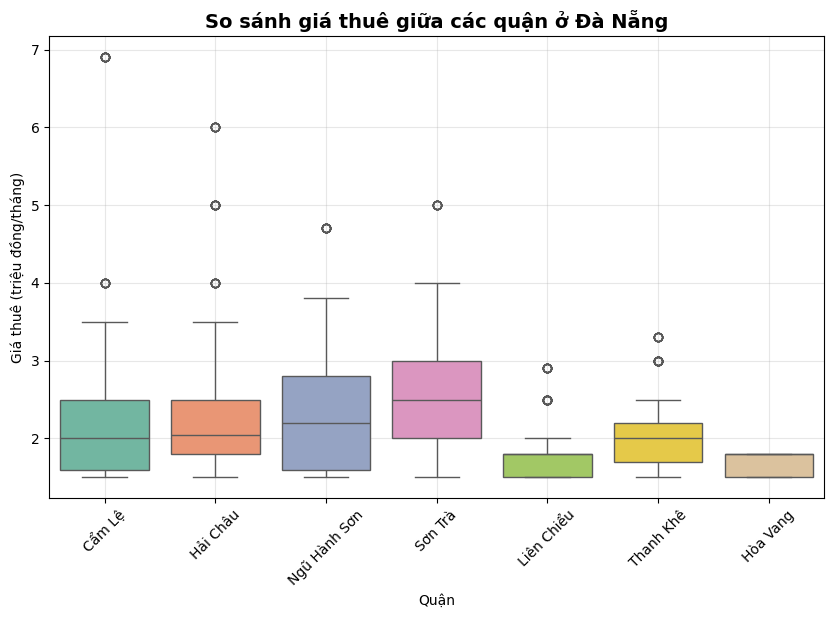

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

df['price_million'] = df['price'] / 1_000_000
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='district', y='price_million', data=df, palette='Set2')
plt.title("So sánh giá thuê giữa các quận ở Đà Nẵng", fontsize=14, weight='bold')
plt.xlabel("Quận")
plt.ylabel("Giá thuê (triệu đồng/tháng)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


#Giúp bạn xem quận nào đắt nhất (ví dụ Hải Châu cao hơn Cẩm Lệ).


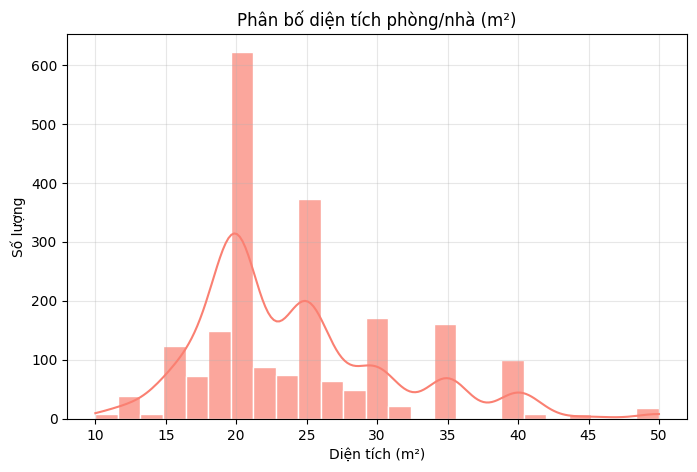

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['area'], bins=25, kde=True, color='salmon', edgecolor='white', alpha=0.7)
plt.title("Phân bố diện tích phòng/nhà (m²)")
plt.xlabel("Diện tích (m²)")
plt.ylabel("Số lượng")
plt.grid(alpha=0.3)
plt.show()


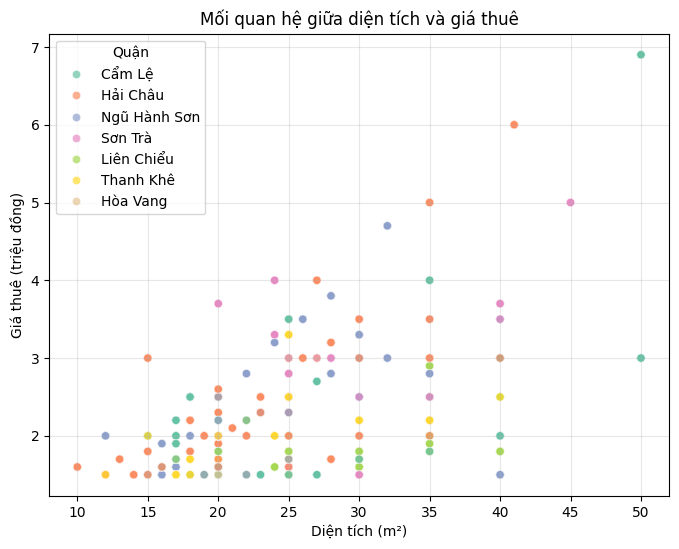

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='area',               # Diện tích
    y='price_million',      # Giá theo triệu đồng
    data=df,
    hue='district',         # Tô màu theo quận (tùy chọn)
    palette='Set2',
    alpha=0.7
)
plt.title("Mối quan hệ giữa diện tích và giá thuê")
plt.xlabel("Diện tích (m²)")
plt.ylabel("Giá thuê (triệu đồng)")
plt.legend(title="Quận")
plt.grid(alpha=0.3)
plt.show()
